<a href="https://colab.research.google.com/github/Harshh18/Computer-Vision-Practicals/blob/main/Exp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

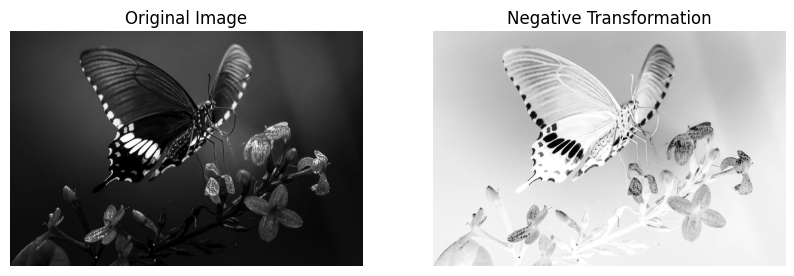

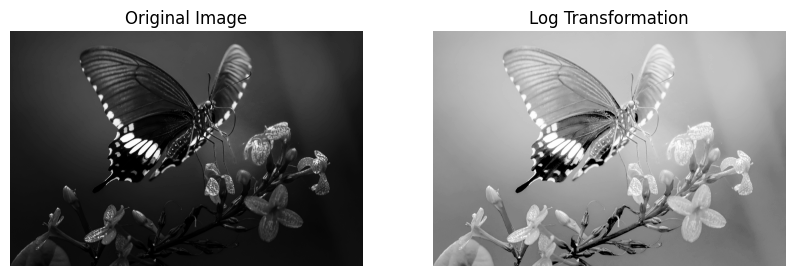

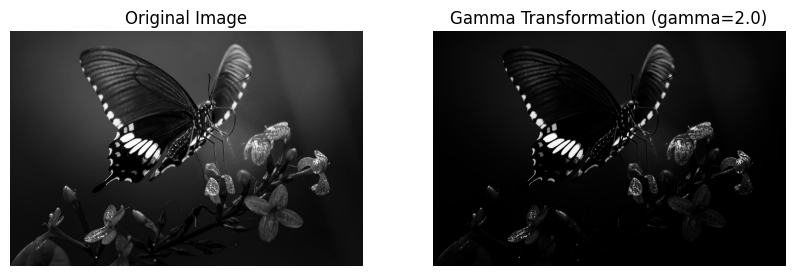

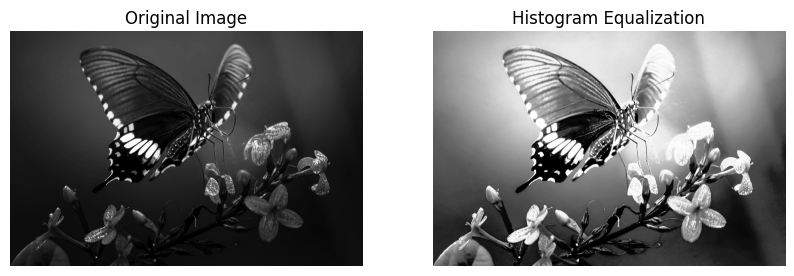

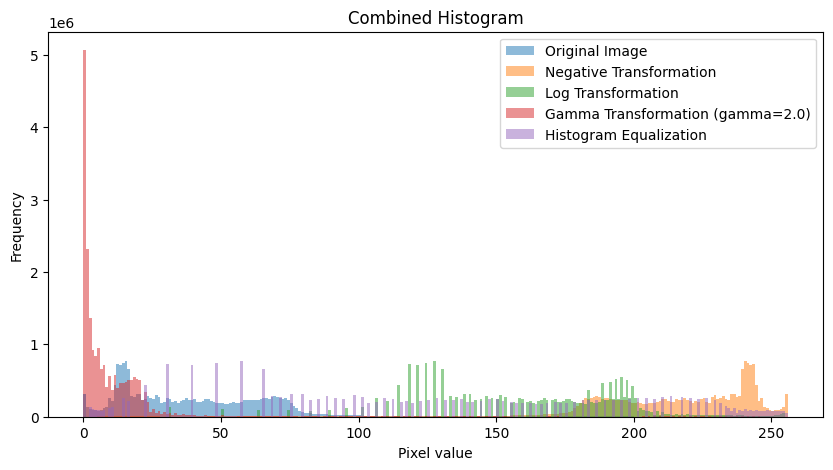

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_image(image_path):
    """Load a grayscale image from the specified path."""
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return image

def negative_transformation(image):
    """Apply negative transformation to the image."""
    return 255 - image

def log_transformation(image):
    """Apply log transformation to the image."""
    c = 255 / np.log(1 + np.max(image))
    log_image = c * (np.log(1 + image))
    return np.array(log_image, dtype=np.uint8)

def gamma_transformation(image, gamma):
    """Apply gamma transformation to the image."""
    c = 1.0
    gamma_image = c * np.power(image / 255.0, gamma) * 255.0
    return np.array(gamma_image, dtype=np.uint8)

def histogram_equalization(image):
    """Apply histogram equalization to the image."""
    equalized_image = cv2.equalizeHist(image)
    return equalized_image

def display_images(original_image, transformed_image, title):
    """Display the original and transformed images side by side."""
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(transformed_image, cmap='gray')
    plt.title(title)
    plt.axis('off')

    plt.show()

def plot_combined_histogram(images, titles):
    """Plot combined histogram of the images."""
    plt.figure(figsize=(10, 5))
    for image, title in zip(images, titles):
        plt.hist(image.ravel(), bins=256, range=[0, 256], alpha=0.5, label=title)
    plt.title("Combined Histogram")
    plt.xlabel('Pixel value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Example usage:

# 1. Load the grayscale image
image_path = '/content/Butterfly-image.jpg'
image = load_image(image_path)

# 2. Apply transformations
negative_image = negative_transformation(image)
log_image = log_transformation(image)
gamma = 2.0
gamma_image = gamma_transformation(image, gamma)
equalized_image = histogram_equalization(image)

# 3. Display images
display_images(image, negative_image, "Negative Transformation")
display_images(image, log_image, "Log Transformation")
display_images(image, gamma_image, f"Gamma Transformation (gamma={gamma})")
display_images(image, equalized_image, "Histogram Equalization")

# 4. Plot combined histogram
images = [image, negative_image, log_image, gamma_image, equalized_image]
titles = ["Original Image", "Negative Transformation", "Log Transformation",
          f"Gamma Transformation (gamma={gamma})", "Histogram Equalization"]
plot_combined_histogram(images, titles)